In [7]:
import pandas as pd

from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

register_matplotlib_converters()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\trait

AttributeError: _ARRAY_API not found

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [8]:
df_p = pd.read_csv('data/day_ahead_prices.csv')

df_p.rename(columns={'Unnamed: 0': 'date', 'Price': 'DA_prices'}, inplace=True)
df_p.index = df_p['date']

df_p.index = pd.to_datetime(df_p.index, utc=True)
df_p.index = df_p.index.tz_convert("Europe/Paris")
df_p.index = pd.DatetimeIndex(df_p.index).to_period('15min')

df_p.drop(['date', 'Hour_q'], axis=1, inplace=True)

df_p

C:\Users\patri\AppData\Local\Temp\ipykernel_6492\1569289159.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_p.index = pd.DatetimeIndex(df_p.index).to_period('15min')


,DA_prices
date,
2022-01-01 00:00,61.83783
2022-01-02 00:00,57.07848
2022-01-03 00:00,20.89311
2022-01-04 00:00,110.14028
2022-01-05 00:00,109.85968
...,...
2024-11-06 23:00,111.42000
2024-11-07 23:00,102.19000
2024-11-08 23:00,104.06000


In [9]:
df_2 = pd.read_csv('data/IDA2.csv')

df_2.rename(columns={'DeliveryDateTime': 'date', 'Price': 'price_IDA2'}, inplace=True)
df_2.index = df_2['date']

df_2.index = pd.to_datetime(df_2.index, utc=True)
df_2.index = df_2.index.tz_convert("Europe/Paris")
df_2.index = pd.DatetimeIndex(df_2.index).to_period('15min')

# add hours
df_2['Hour'] = df_2.index.hour
df_2['Minute'] = df_2.index.minute
df_2['DayOfWeek'] = df_2.index.dayofweek
df_2['shift_1d'] = df_2['price_IDA2'].shift(96).dropna()
df_2['shift_1w'] = df_2['price_IDA2'].shift(96*7).dropna()

# drop na values
df_2.dropna(inplace=True)

df_2.drop(['date'], axis=1, inplace=True)
df_2.sort_index(inplace=True)
df_2.tail()

C:\Users\patri\AppData\Local\Temp\ipykernel_6492\1741738161.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_2.index = pd.DatetimeIndex(df_2.index).to_period('15min')


,price_IDA2,Hour,Minute,DayOfWeek,shift_1d,shift_1w
date,,,,,,
2024-11-03 22:45,102.85,22,45,6,102.05,117.02
2024-11-03 23:00,108.21,23,0,6,108.10,139.99
2024-11-03 23:15,97.69,23,15,6,99.95,117.85
2024-11-03 23:30,101.00,23,30,6,90.00,97.71
2024-11-03 23:45,91.62,23,45,6,85.09,78.61


In [6]:
df = pd.merge(df_p, df_2, how='right', left_index=True, right_index=True)
df.ffill(inplace=True)
df.dropna()
df

,DA_prices,price_IDA2,Hour,Minute,DayOfWeek,shift_1d,shift_1w
date,,,,,,,
2024-06-14 01:15,NaN,74.35,1,15,4,110.00,88.80
2024-06-14 01:30,NaN,69.97,1,30,4,96.40,80.06
2024-06-14 01:45,NaN,59.47,1,45,4,97.50,70.49
2024-06-14 02:00,58.22,77.77,2,0,4,92.60,71.09
2024-06-14 02:15,58.22,71.22,2,15,4,84.47,100.91
...,...,...,...,...,...,...,...
2024-11-03 22:45,104.85,102.85,22,45,6,102.05,117.02
2024-11-03 23:00,98.45,108.21,23,0,6,108.10,139.99
2024-11-03 23:15,98.45,97.69,23,15,6,99.95,117.85


RMSE: 28.71487017863527


<Axes: xlabel='date'>

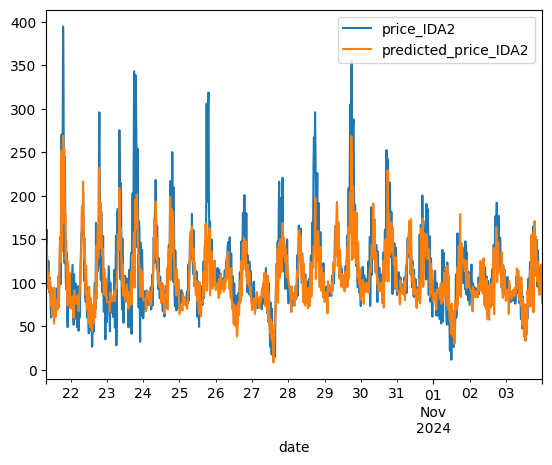

In [306]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree

X = df[['Hour', 'Minute', 'shift_1d', 'shift_1w', 'DA_prices', 'DayOfWeek']]
y = df['price_IDA2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=False)

# Train the model
# model = SGDRegressor(loss='squared_error', max_iter=1000)
model = HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.5)
model.fit(X_train, y_train)

# {'squared_error', 'gamma', 'absolute_error', 'poisson', 'quantile'}

# Make predictions
pred = pd.Series(model.predict(X_test), index=y_test.index)

merge = pd.concat([y_test, pred], axis=1, ignore_index=True)
merge.rename(columns={0: 'price_IDA2', 1: 'predicted_price_IDA2'}, inplace=True)

#Analyse results
mae = root_mean_squared_error(merge['price_IDA2'], merge['predicted_price_IDA2'])

print(f'RMSE: {mae}')
merge.plot()

In [210]:
merge

,price_IDA2,Predicted_Price_IDA2
date,,
2024-10-21 07:30,143.31,108.102427
2024-10-21 07:45,161.37,108.102427
2024-10-21 08:00,137.75,112.860060
2024-10-21 08:15,124.96,105.712036
2024-10-21 08:30,110.49,101.991375
...,...,...
2024-11-03 22:45,102.85,89.125381
2024-11-03 23:00,108.21,100.741086
2024-11-03 23:15,97.69,88.856898


In [175]:
# df['diff_96'] = df.diff(96).dropna()
# df['diff_1w'] = df['price_IDA2'].diff(672).dropna()
df

,price_IDA2,Hour,Minute,Day
date,,,,
2024-06-14 00:00,137.90,0,0,4
2024-06-14 00:15,113.89,0,15,4
2024-06-14 00:30,86.51,0,30,4
2024-06-14 00:45,83.80,0,45,4
2024-06-14 01:00,78.60,1,0,4
...,...,...,...,...
2024-11-02 22:45,102.07,22,45,5
2024-11-02 23:00,114.78,23,0,5
2024-11-02 23:15,105.99,23,15,5


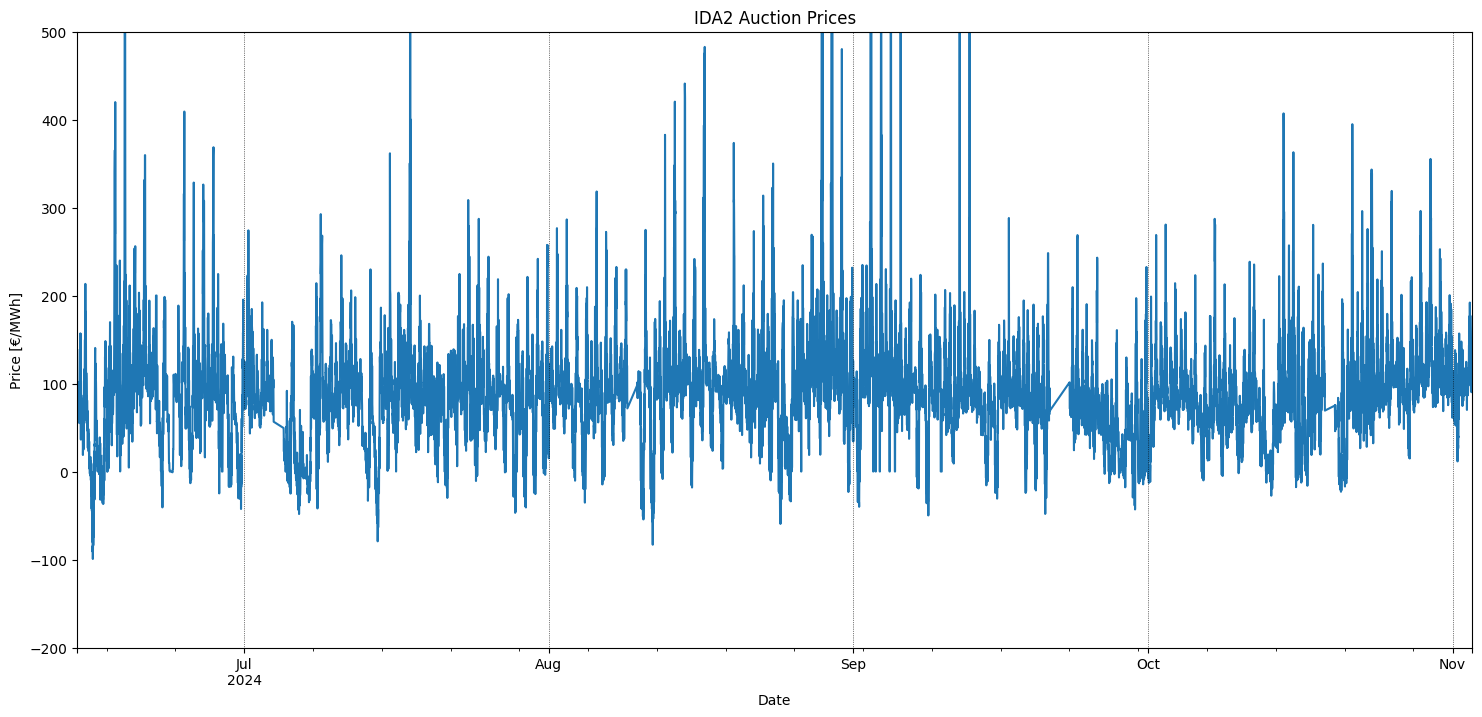

In [176]:
fig, ax = plt.subplots(figsize=(18, 8))
df['price_IDA2'].plot(ax=ax)
plt.title('IDA2 Auction Prices')
plt.xlabel('Date')
plt.ylabel('Price [€/MWh]')
for month in range(7, 12):
	plt.axvline(pd.to_datetime('2024-' + str(month) + '-01'), color='k', ls='dotted', lw=0.5)

# plt.axvline(pd.to_datetime('2024-11-02'), color='k', ls='dotted', lw=0.5)
# plt.axvline(pd.to_datetime('2024-10-26'), color='k', ls='dotted', lw=0.5)
# plt.axvline(pd.to_datetime('2024-10-21'), color='k', ls='dotted', lw=0.5)

ax.set_ylim([-200, 500])
plt.show()

In [177]:
acf_plot = plot_acf(df['diff_1w'].dropna(), lags=24*4*8)

KeyError: 'diff_1w'

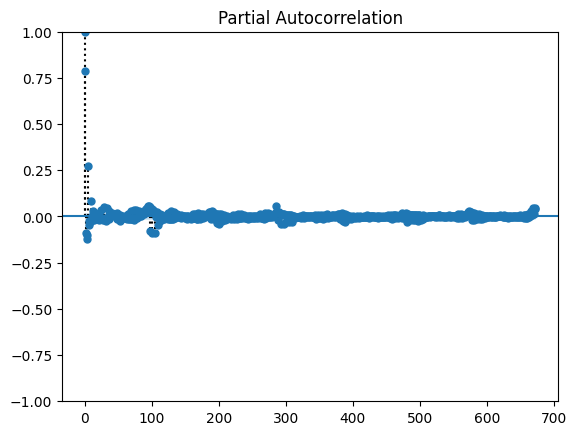

In [9]:
pacf_plot = plot_pacf(df['price_IDA2'], lags=24*4*7, vlines_kwargs={'colors': 'k', 'linestyles': 'dotted'}, )

# lags to include > 96
96, 100, 104, 108
288

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['price_IDA2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -16.734283
p-value: 0.000000


In [22]:
train, test = df[:-24*4*14], df[-24*4*14:]

In [23]:
train

,price_IDA2,diff_96,diff_1w
date,,,
2024-06-14 00:00,137.90,NaN,NaN
2024-06-14 00:15,113.89,NaN,NaN
2024-06-14 00:30,86.51,NaN,NaN
2024-06-14 00:45,83.80,NaN,NaN
2024-06-14 01:00,78.60,NaN,NaN
...,...,...,...
2024-10-18 21:45,98.75,53.75,16.62
2024-10-18 22:00,126.50,-13.22,24.39
2024-10-18 22:15,96.22,-9.38,-5.14


In [24]:
test

,price_IDA2,diff_96,diff_1w
date,,,
2024-10-18 23:00,111.11,-0.18,5.13
2024-10-18 23:15,94.96,1.57,4.74
2024-10-18 23:30,80.11,20.07,-1.80
2024-10-18 23:45,69.22,34.22,-4.26
2024-10-20 00:00,74.95,-18.05,-28.91
...,...,...,...
2024-11-02 22:45,102.07,22.07,15.26
2024-11-02 23:00,114.78,2.10,-9.78
2024-11-02 23:15,105.99,6.81,-3.30


In [ ]:
da

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Drop rows with NaN values
data = data.dropna()

# Add hour and minute columns
data['Hour'] = data['DeliveryDateTime'].dt.hour
data['Minute'] = data['DeliveryDateTime'].dt.minute
data=data.set_index('DeliveryDateTime')

# Split date on train/test set
split_date = '2024-09-15'  # Change this to your desired date if needed
train_df = data[data.index < split_date]
test_df = data[data.index >= split_date]

X_train = train_df[['Hour', 'Minute','Price_DA']]
y_train = train_df['Price_IDA2']

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Prepare test features
X_test = test_df[['Hour', 'Minute','Price_DA']]

# Make predictions
test_df['Predicted_Price_IDA2'] = model.predict(X_test)


#Analyse results
mae = mean_absolute_error(test_df['Price_IDA2'], test_df['Predicted_Price_IDA2'])

print(f'Mean Absolute Error: {mae}')
test_df[['Predicted_Price_IDA2','Price_IDA2']].plot()

In [32]:
model_fit.summary()

AttributeError: 'numpy.ndarray' object has no attribute 'summary'